# Расчет количества преподавателей исходя из их средней нагрузки и количества уроков в месяц

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv #вычисление обратной матрицы
from sklearn.metrics import mean_absolute_error #поиск средней ошибки в абсолютном и квадратичном смысле

data = pd.read_csv("classes.csv")

In [7]:
data['start_at']= pd.to_datetime(data['start_at']) 
#data.sort_values(by = "start_at", inplace = True)
data['year'] = data['start_at'].dt.year
data['month'] = data['start_at'].dt.month
lessons_count = data.groupby(['year', 'month'])['start_at'].count()
teachers_count = data.groupby(['year', 'month'])['teacher_id'].nunique()

Средняя нагрузка преподавателя в месяц

In [8]:
relation = lessons_count/teachers_count
relation = relation.groupby(['month']).mean()

In [10]:
Y_true = lessons_count
Y_true.index = range(25)

Y = np.matrix(Y_true).T
Y_train = Y[:-1]
A = np.matrix(np.concatenate((np.ones(shape = (Y_true.size-1, 1), dtype = int), np.arange(0,Y_true.size-1).reshape(Y_true.size-1,1)), axis=1))
#один месяц отрезаем для проверки

In [11]:
tetta = np.dot(np.dot(inv(np.dot(A.T,A)),A.T), Y_train)
a0 = float(tetta[0,0])
k = float(tetta[1,0])
print("Оценки параметров: a = {0}, k = {1} ".format(a0, k))

Оценки параметров: a = 7487.836666666676, k = 4677.224347826088 


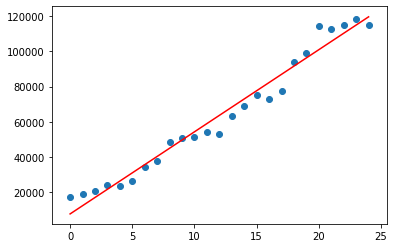

In [12]:
x = np.linspace(0, Y_train.size,Y_train.size + 1)
Y_pred = a0 + x * k

plt.plot(x, Y_pred, '-r')
plt.scatter(Y_true.index, Y_true)
plt.show()

In [13]:
print("Ошибка количества преподавателей на тестовом месяце: ", (a0 + (Y_train.size) * k)/relation[9] - teachers_count[24])

Ошибка количества преподавателей на тестовом месяце:  648.3452881814628


In [14]:
print("Предсказанное количество преподавателей в следующем (10ом) месяце:\n", (a0 + (Y_train.size + 1)*k)/relation[10])

Предсказанное количество преподавателей в следующем (10ом) месяце:
 8723.448034014242


### Оценка точности модели

In [24]:
j = 5
res = 0
for i in range(20,25):
    res = res + abs(teachers_count[i] - Y_pred[i]/relation[j])
    j = j + 1
print("Средняя абсолютная ошибка за последние пять месяцев: ", res/5)

Средняя абсолютная ошибка за последние пять месяцев:  360.2497606719653
